In [91]:
#lstm vs simple rnn with custom movie dataset with help of tesorflow and keras

In [92]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import Dense,Activation,Embedding,SimpleRNN,LSTM,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [93]:
data={"text":["the movie is not that much good for watching it is only for children and youngsters",
              "# it is awesome to watch the entire movie ",
              "the movie is blockbuster hit because the actor and actress comination is good !",
              "the movie is full of action thriller and combine with comedy ",
              "old man are saying movie is poor to watch because movie is not giving any information",
              "it is the combination of love and FIGHT scenes no motto or information ",
              "the movie is likely to see for actor !",
              "the movie is excellent and good to watch",
              "it is failed to give good sceenplay and songs ?",
              "at the end of the movie the story has been totally collapsed <>"],
        "rating":[0,1,1,1,0,0,0,1,0,0]}

In [94]:
df=pd.DataFrame(data)

In [95]:
df

,text,rating
0,the movie is not that much good for watching i...,0
1,# it is awesome to watch the entire movie,1
2,the movie is blockbuster hit because the actor...,1
3,the movie is full of action thriller and combi...,1
4,old man are saying movie is poor to watch beca...,0
5,it is the combination of love and FIGHT scenes...,0
6,the movie is likely to see for actor !,0
7,the movie is excellent and good to watch,1
8,it is failed to give good sceenplay and songs ?,0
9,at the end of the movie the story has been tot...,0


In [96]:
df['rating'].unique()

array([0, 1], dtype=int64)

In [97]:
df['rating'].value_counts()

rating
0    6
1    4
Name: count, dtype: int64

In [98]:
lemmatize=WordNetLemmatizer()

In [99]:
corpus=[]
for i in range(len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['text'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatize.lemmatize(word,pos='v') for word in review if word not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)
    

In [100]:
corpus

['movie much good watch children youngsters',
 'awesome watch entire movie',
 'movie blockbuster hit actor actress comination good',
 'movie full action thriller combine comedy',
 'old man say movie poor watch movie give information',
 'combination love fight scenes motto information',
 'movie likely see actor',
 'movie excellent good watch',
 'fail give good sceenplay songs',
 'end movie story totally collapse']

In [101]:
vocab=30

In [102]:
one_hot=[one_hot(word,vocab) for word in corpus]

In [103]:
one_hot

[[13, 11, 3, 16, 15, 11],
 [16, 16, 6, 13],
 [13, 1, 6, 5, 22, 1, 3],
 [13, 24, 5, 9, 10, 18],
 [1, 11, 14, 13, 26, 16, 13, 11, 2],
 [26, 29, 9, 18, 29, 2],
 [13, 24, 18, 5],
 [13, 12, 3, 16],
 [8, 11, 3, 29, 28],
 [20, 13, 14, 26, 8]]

In [104]:
corpus[0]

'movie much good watch children youngsters'

In [105]:
one_hot[0]

[13, 11, 3, 16, 15, 11]

In [106]:
max_length=max([len(vec) for vec in one_hot])

In [107]:
max_length

9

In [108]:
pad_sequences=pad_sequences(one_hot,maxlen=max_length)

In [109]:
pad_sequences

array([[ 0,  0,  0, 13, 11,  3, 16, 15, 11],
       [ 0,  0,  0,  0,  0, 16, 16,  6, 13],
       [ 0,  0, 13,  1,  6,  5, 22,  1,  3],
       [ 0,  0,  0, 13, 24,  5,  9, 10, 18],
       [ 1, 11, 14, 13, 26, 16, 13, 11,  2],
       [ 0,  0,  0, 26, 29,  9, 18, 29,  2],
       [ 0,  0,  0,  0,  0, 13, 24, 18,  5],
       [ 0,  0,  0,  0,  0, 13, 12,  3, 16],
       [ 0,  0,  0,  0,  8, 11,  3, 29, 28],
       [ 0,  0,  0,  0, 20, 13, 14, 26,  8]])

In [110]:
model=Sequential()
model.add(Embedding(vocab,10,input_length=max_length))
model.add(SimpleRNN(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [111]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [112]:
x=pad_sequences

In [113]:
y=df['rating']

In [114]:
x,y

(array([[ 0,  0,  0, 13, 11,  3, 16, 15, 11],
        [ 0,  0,  0,  0,  0, 16, 16,  6, 13],
        [ 0,  0, 13,  1,  6,  5, 22,  1,  3],
        [ 0,  0,  0, 13, 24,  5,  9, 10, 18],
        [ 1, 11, 14, 13, 26, 16, 13, 11,  2],
        [ 0,  0,  0, 26, 29,  9, 18, 29,  2],
        [ 0,  0,  0,  0,  0, 13, 24, 18,  5],
        [ 0,  0,  0,  0,  0, 13, 12,  3, 16],
        [ 0,  0,  0,  0,  8, 11,  3, 29, 28],
        [ 0,  0,  0,  0, 20, 13, 14, 26,  8]]),
 0    0
 1    1
 2    1
 3    1
 4    0
 5    0
 6    0
 7    1
 8    0
 9    0
 Name: rating, dtype: int64)

In [115]:
earlystopping=EarlyStopping(monitor='accuracy',restore_best_weights=True,patience=30)

In [116]:
history=model.fit(x,y,epochs=50,callbacks=[earlystopping],verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4000 - loss: 0.6910
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4000 - loss: 0.6870
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 0.6832
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7000 - loss: 0.6796
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8000 - loss: 0.6761
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8000 - loss: 0.6726
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8000 - loss: 0.6690
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8000 - loss: 0.6654
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8000 - loss: 0.6619
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9000 - loss: 0.6583
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9000 - loss: 0.6544
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9000 - loss: 0.6504
Epo

In [117]:
x1=x[6]

In [118]:
x1.reshape(1,-1)

array([[ 0,  0,  0,  0,  0, 13, 24, 18,  5]])

In [119]:
model.predict(x1.reshape(1,-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


array([[0.4827113]], dtype=float32)

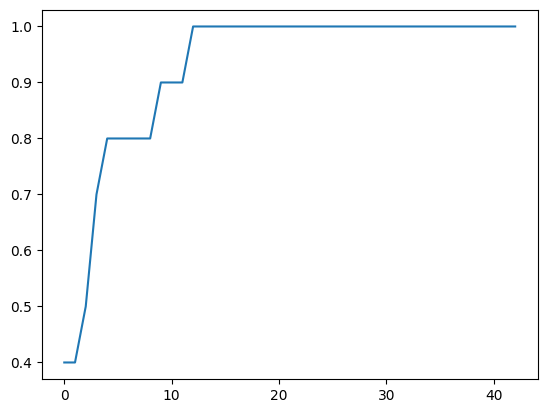

In [120]:
plt.plot(history.history['accuracy'])

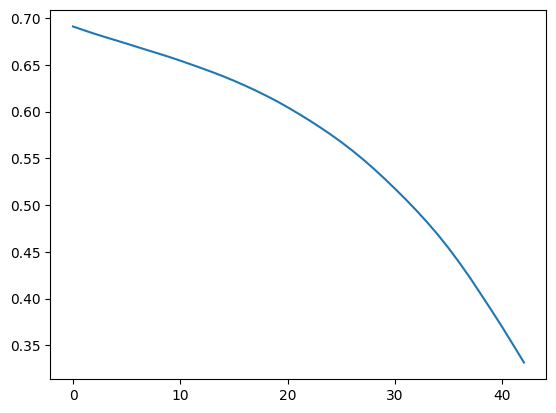

In [121]:
plt.plot(history.history['loss'])

In [122]:
#now let see the lstm how it performed compare with simple rnn

In [123]:
model1=Sequential()
model1.add(Embedding(vocab,20,input_length=max_length))
model1.add(LSTM(16))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation='sigmoid'))

In [124]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [125]:
x

array([[ 0,  0,  0, 13, 11,  3, 16, 15, 11],
       [ 0,  0,  0,  0,  0, 16, 16,  6, 13],
       [ 0,  0, 13,  1,  6,  5, 22,  1,  3],
       [ 0,  0,  0, 13, 24,  5,  9, 10, 18],
       [ 1, 11, 14, 13, 26, 16, 13, 11,  2],
       [ 0,  0,  0, 26, 29,  9, 18, 29,  2],
       [ 0,  0,  0,  0,  0, 13, 24, 18,  5],
       [ 0,  0,  0,  0,  0, 13, 12,  3, 16],
       [ 0,  0,  0,  0,  8, 11,  3, 29, 28],
       [ 0,  0,  0,  0, 20, 13, 14, 26,  8]])

In [126]:
y

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    1
8    0
9    0
Name: rating, dtype: int64

In [127]:
earlystopping1=EarlyStopping(monitor='accuracy',restore_best_weights=True,patience=30)

In [128]:
history=model1.fit(x,y,epochs=50,callbacks=[earlystopping1],verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4000 - loss: 0.6944
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3000 - loss: 0.6934
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6000 - loss: 0.6910
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8000 - loss: 0.6894
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8000 - loss: 0.6866
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8000 - loss: 0.6871
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8000 - loss: 0.6855
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7000 - loss: 0.6799
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7000 - loss: 0.6825
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7000 - loss: 0.6795
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7000 - loss: 0.6762
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7000 - loss: 0.6756
Epo

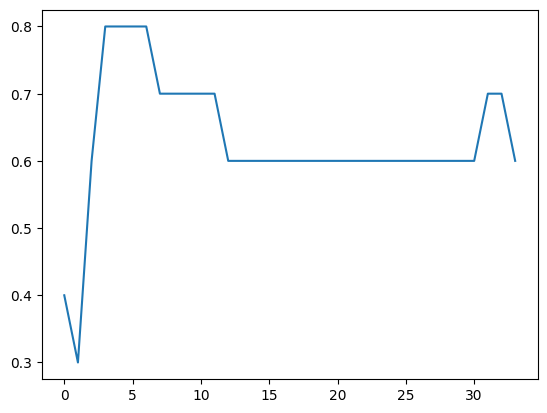

In [129]:
plt.plot(history.history['accuracy'])

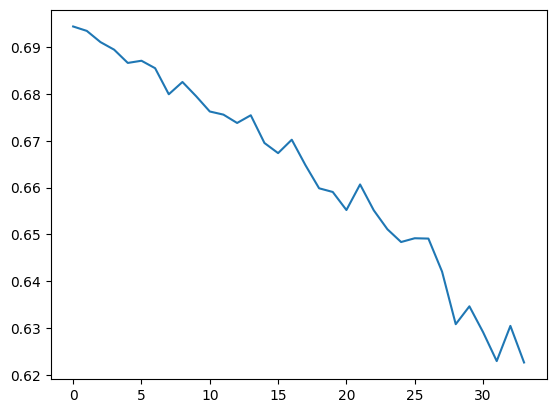

In [130]:
plt.plot(history.history['loss'])

In [131]:
x[6]

array([ 0,  0,  0,  0,  0, 13, 24, 18,  5])

In [132]:
df

,text,rating
0,the movie is not that much good for watching i...,0
1,# it is awesome to watch the entire movie,1
2,the movie is blockbuster hit because the actor...,1
3,the movie is full of action thriller and combi...,1
4,old man are saying movie is poor to watch beca...,0
5,it is the combination of love and FIGHT scenes...,0
6,the movie is likely to see for actor !,0
7,the movie is excellent and good to watch,1
8,it is failed to give good sceenplay and songs ?,0
9,at the end of the movie the story has been tot...,0


In [133]:
pred=model1.predict(x[2].reshape(1,-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


In [134]:
pred

array([[0.50280833]], dtype=float32)

In [135]:
if pred[0]>0.5:
    print("positive")
else:
    print("negative")

positive
